# Project: Forecasting Electricity Prices using ARIMA Model
Name: Ali Hassan

## Project Idea

The main idea is to forecast the electricity prices as it effect the decision making mechanism of the energy companies. The project is based on the AutoregRessive Integrated Moving Average (ARIMA) model. The data is collected from the U.S. Energy Information Administration (EIA) website https://www.eia.gov/about/. Several references are used to study and understand the ARIMA models and its implementation in Python. These references are mentioned at the end of this notebook. Basic concepts are adopted from these references and modified to the requirements of this project.

## Loading the data

First loading all the required packages.

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Importing data from the csv file and parsing the time string. The data is dated from 1990-01-01 to 2017-07-01. The unit for price is cents per kilowatthour (kWh). 

In [2]:
def parser(x):
	return datetime.strptime( x, '%Y-%m')
y = read_csv('Data_price.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(y)

Date
1990-01-01     6.93
1990-02-01     7.15
1990-03-01     7.23
1990-04-01     7.20
1990-05-01     7.31
1990-06-01     7.49
1990-07-01     7.52
1990-08-01     7.53
1990-09-01     7.50
1990-10-01     7.58
1990-11-01     7.34
1990-12-01     7.17
1991-01-01     7.17
1991-02-01     7.36
1991-03-01     7.37
1991-04-01     7.36
1991-05-01     7.51
1991-06-01     7.64
1991-07-01     7.74
1991-08-01     7.74
1991-09-01     7.76
1991-10-01     7.81
1991-11-01     7.47
1991-12-01     7.30
1992-01-01     7.30
1992-02-01     7.39
1992-03-01     7.44
1992-04-01     7.43
1992-05-01     7.61
1992-06-01     7.89
              ...  
2015-02-01    10.62
2015-03-01    10.63
2015-04-01    10.37
2015-05-01    10.47
2015-06-01    10.89
2015-07-01    11.07
2015-08-01    10.94
2015-09-01    10.98
2015-10-01    10.73
2015-11-01    10.30
2015-12-01    10.13
2016-01-01    10.02
2016-02-01    10.20
2016-03-01    10.16
2016-04-01    10.13
2016-05-01    10.25
2016-06-01    10.59
2016-07-01    10.62
2016-08-01    1

The data is then visualized.

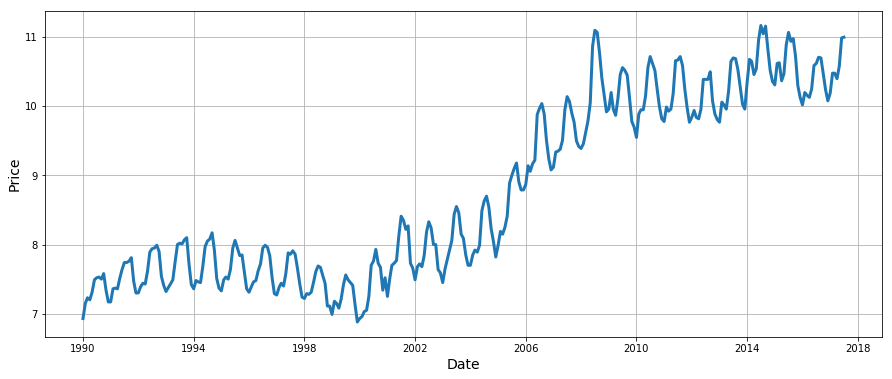

In [3]:
plt.figure(figsize=(15,6))
plt.plot(y, linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.show()

## Fitting seasonal ARIMA model

The seasonal ARIMA model is used here for the time series forecasting to deal with the seasonal effects in the data. Here, order = (p, d, q) represents the non-seasonal parameters, while seasonal_order = (P, D, Q, s) are the seasonal component of the time series. p,P is the auto-regressive part of the model, d,D is the integrated part of the model and q,Q is the moving average part of the model. s is for the periodicity of the time series.

In [4]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 0),seasonal_order=(1, 0, 1, 12))
results = mod.fit()

Here the parameters for the model are selected using the trial and error method. The value of s is set to 12 since the data is periodic on yearly basis. The summary for the model is shown below.

In [5]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Price   No. Observations:                  331
Model:             SARIMAX(1, 1, 0)x(1, 0, 1, 12)   Log Likelihood                 281.525
Date:                            Thu, 21 Dec 2017   AIC                           -555.051
Time:                                    15:43:35   BIC                           -539.842
Sample:                                01-01-1990   HQIC                          -548.985
                                     - 07-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0721      0.047     -1.520      0.129      -0.165       0.021
ar.S.L12       0.9865      0.009   

To ensure the performance of the slected parameters, we run a daignostic test for the model. This idea is presented in both references [2] and [3].

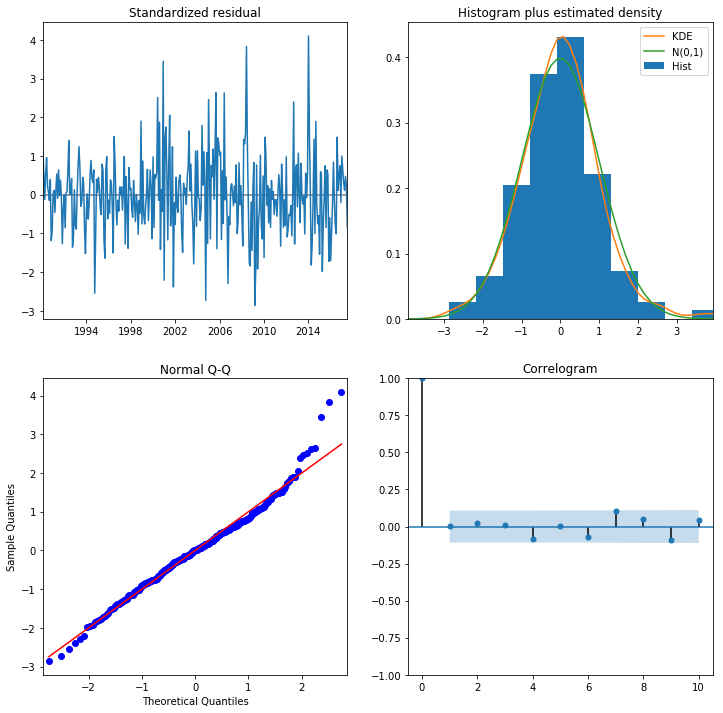

In [6]:
results.plot_diagnostics(figsize=(12, 12))
plt.show()

The diagnostics test shows that the model residuals are normally distributed and model produces a satisfactory fit.

## Testing the model

The next step is to test the performance of the model and the selected parameters on some data. The test data is selected from the period 2012-01-01 to the end. 

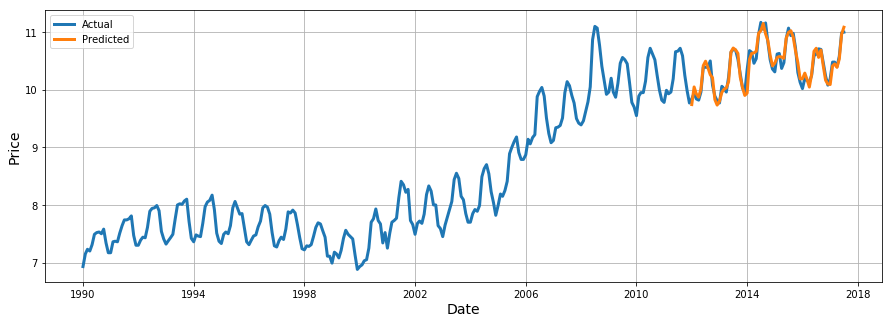

In [7]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-01'))

train = y['1990':]
test = pred.predicted_mean

plt.figure(figsize=(15,5))
plt.plot(train, label='Actual', linewidth=3)
plt.plot(test, label='Predicted', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()

The graphs shows that the predicted values follow the patteren of the actual values. We can also calcultae the mean squared value to test the performance of the model.

In [8]:
obs = y['2012':]
error = mean_squared_error(obs, test)
print('Test MSE: %.3f' % error)

Test MSE: 0.011


This value for mean squared error shows that the model has produced the satisfactory results.

## Forecasting the future values

Next step is to forecast the future values based on the available data. Here we are forecsting the future values using our model. The forecast is done for the next three years or 36 step values. This idea is also presented in the reference [2].

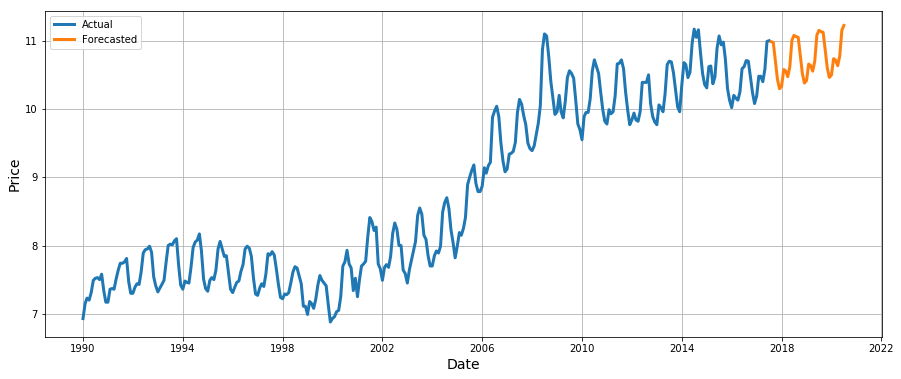

In [9]:
pred_uc = results.get_forecast(steps=36)

actual = y
forecasted = pred_uc.predicted_mean

plt.figure(figsize=(15,6))
plt.plot(actual, label='Actual', linewidth=3)
plt.plot(forecasted, label='Forecasted', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()

## Grid search/Hyperparameter optimization for model selection
Instead of using trail and error method, grid search or hyperparameter optimization approach is often adopted in ARIMA analysis to get the best combination of the both seasonal and non-seasonal parameters. This approach has been used in both the refereces [1] and [2]. The code below is taken from the reference [2] and modified to the requirements of this project.

In [10]:
warnings.filterwarnings("ignore")
d = range(0, 2)
q = range(0, 2)
p = range(0, 2)
bb = []

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1981.8496139688395
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:178.92375000729777
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:176.8517018476629
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:163.83481127112668
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:-100.60127831070743
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:-98.60203339211878
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:-98.60231051694132
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:-106.89532337933481
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:-275.3630907314666
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:-547.241687326483
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:-452.70403444403127
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:-555.3831287636278
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:-509.5249142326235
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:-545.6815021476718
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:-182.92016693560421
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:-294.76707759415183
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:-413.8892877280988
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:-547.8480608220468
ARIMA(0, 1, 1)x(1, 0, 0, 

Here the parameters resulting in the lowest AIC value are ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:-555.3831287636278. We will use these parameters now and observe the difference with our initially selected parameters. 

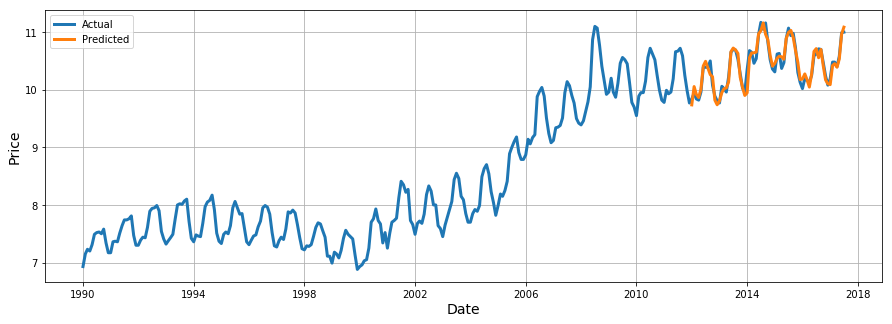

Test MSE: 0.011


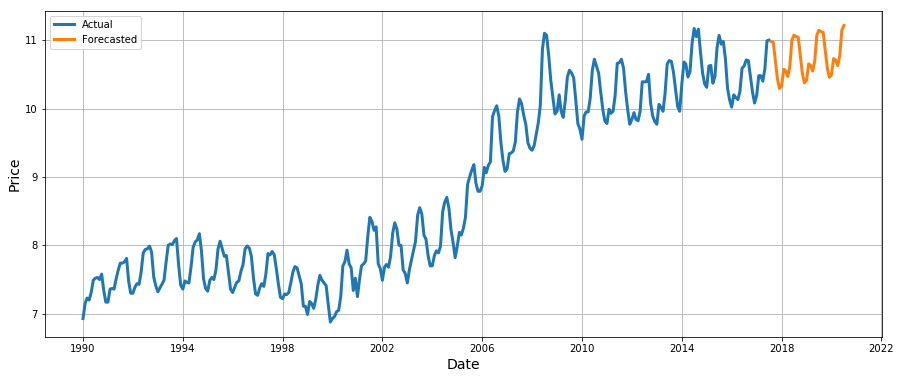

In [11]:
mod = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 0),seasonal_order=(1, 0, 1, 12))
results = mod.fit()
pred = results.get_prediction(start=pd.to_datetime('2012-01-01'))
train = y['1990':]
test = pred.predicted_mean
plt.figure(figsize=(15,5))
plt.plot(train, label='Actual', linewidth=3)
plt.plot(test, label='Predicted', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()
obs = y['2012':]
error = mean_squared_error(obs, test)
print('Test MSE: %.3f' % error)

pred_uc = results.get_forecast(steps=36)
actual = y
forecasted = pred_uc.predicted_mean
plt.figure(figsize=(15,6))
plt.plot(actual, label='Actual', linewidth=3)
plt.plot(forecasted, label='Forecasted', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()

These results are almost equal to the ones obtained using the trail and error method. <br>
Next step is to change the value of s and see the effects on the results.

## Increasing the value of periodcity (s) for the time series

In the above observations, the value of 12 is selected for the periodicity parameter of the seasonal ARIMA model to represent an year. Here its value will be increased to the multiples of 12 to observe the behaviour of the changes. 

### For s = 24

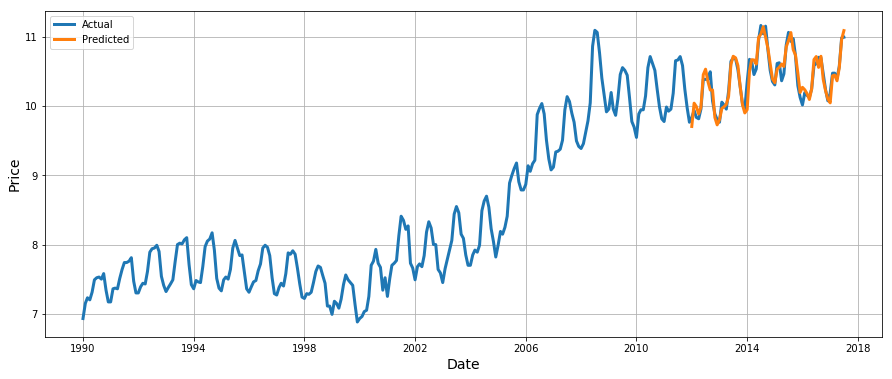

Test MSE: 0.013


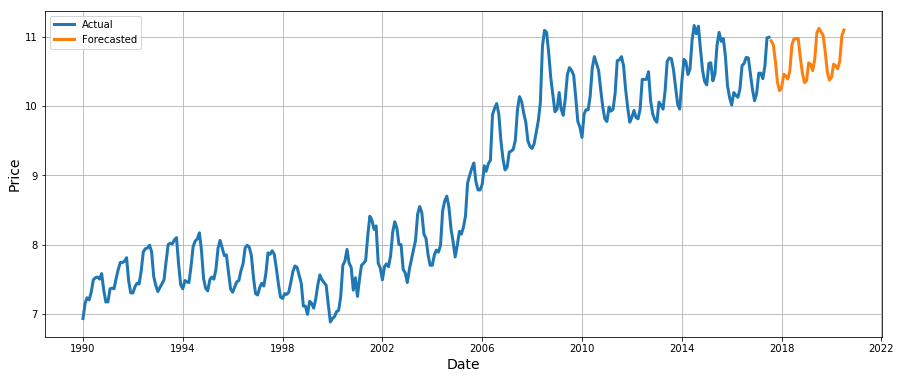

In [12]:
mod_2 = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 0),seasonal_order=(1, 0, 1, 24))
results_2 = mod_2.fit()
pred_2 = results_2.get_prediction(start=pd.to_datetime('2012-01-01'))

train_2 = y['1990':]
test_2 = pred_2.predicted_mean

plt.figure(figsize=(15,6))
plt.plot(train_2, label='Actual', linewidth=3)
plt.plot(test_2, label='Predicted', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()
obs_2 = y['2012':]
error = mean_squared_error(obs_2, test_2)
print('Test MSE: %.3f' % error)

pred_uc_2 = results_2.get_forecast(steps=36)
actual = y
forecasted_2 = pred_uc_2.predicted_mean
plt.figure(figsize=(15,6))
plt.plot(actual, label='Actual', linewidth=3)
plt.plot(forecasted_2, label='Forecasted', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()

### For s = 36

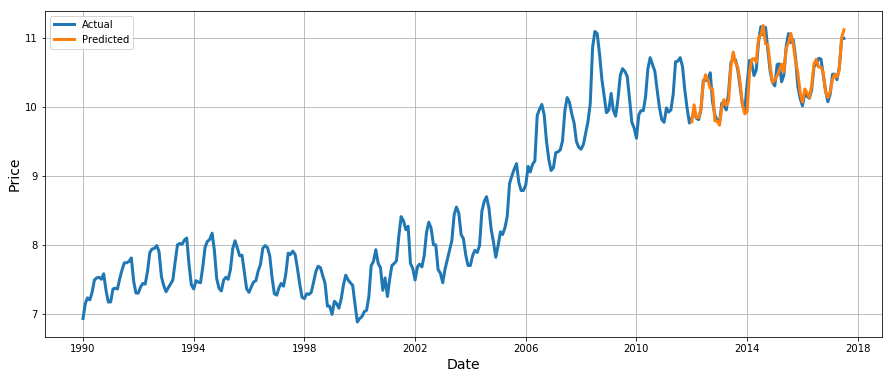

Test MSE: 0.012


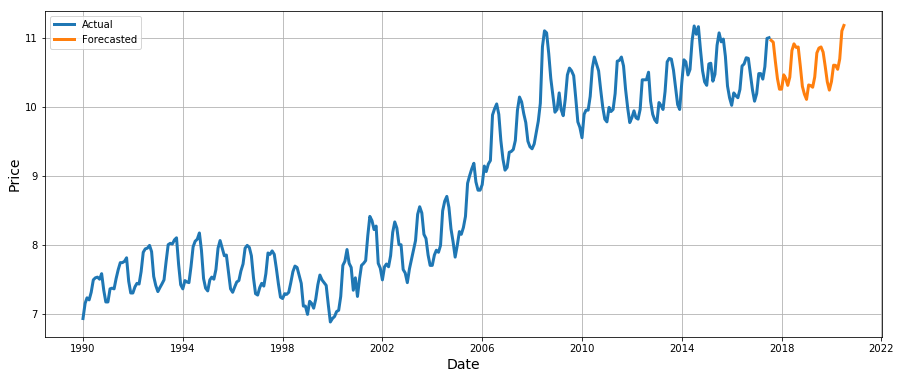

In [15]:
mod_3 = sm.tsa.statespace.SARIMAX(y,order=(0, 1, 0),seasonal_order=(1, 0, 1, 36))
results_3 = mod_3.fit()
pred_3 = results_3.get_prediction(start=pd.to_datetime('2012-01-01'))

train_3 = y['1990':]
test_3 = pred_3.predicted_mean

plt.figure(figsize=(15,6))
plt.plot(train_3, label='Actual', linewidth=3)
plt.plot(test_3, label='Predicted', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()
obs_3 = y['2012':]
error = mean_squared_error(obs_3, test_3)
print('Test MSE: %.3f' % error)

pred_uc_3 = results_3.get_forecast(steps=36)
actual = y
forecasted_3 = pred_uc_3.predicted_mean

plt.figure(figsize=(15,6))
plt.plot(actual, label='Actual', linewidth=3)
plt.plot(forecasted_3, label='Forecasted', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()

#### Observation 
We have observed an interesting observation here that increasing the value of s from 12 to its multiples of 24 and 36 results in different forecasted values pattern. To show this in a more clear manner, we increased the forecast period from 3 to 10 years and plotted all the forecasted values for the different s values on the same plot.

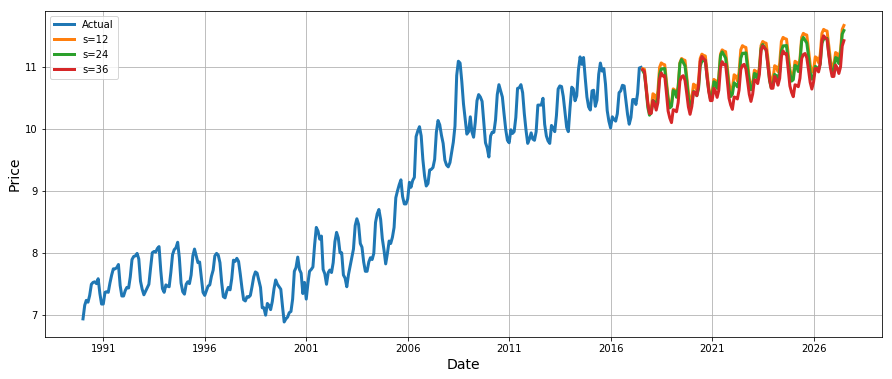

In [16]:
pred_uc = results.get_forecast(steps=120)
forecasted = pred_uc.predicted_mean
pred_uc_2 = results_2.get_forecast(steps=120)
forecasted_2 = pred_uc_2.predicted_mean
pred_uc_3 = results_3.get_forecast(steps=120)
forecasted_3 = pred_uc_3.predicted_mean

plt.figure(figsize=(15,6))
plt.plot(actual, label='Actual', linewidth=3)
plt.plot(forecasted, label='s=12', linewidth=3)
plt.plot(forecasted_2, label='s=24', linewidth=3)
plt.plot(forecasted_3, label='s=36', linewidth=3)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid()
plt.legend()
plt.show()

## References
[1] https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ <br>
[2] https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3 <br>
[3] https://www.kaggle.com/shellshock1911/eda-forecast-w-arima/notebook